In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data = pd.read_csv('dataset/PimaIndians_processed_new.csv')
diabetes_data[1:10]

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
5,0.529718,1.407219,0.107109,-0.965953,0.159608,-1.038117,0.185349,1.976412,1
6,-1.029213,-0.150141,1.068636,1.699951,0.623000,1.811417,0.081015,0.013271,1
7,-0.717427,-0.636816,-3.258237,0.843053,-0.615520,1.455225,-0.985506,0.209585,0
8,-0.717427,-0.247476,-0.053146,0.081366,-0.505991,0.215678,0.017256,0.111428,1
9,-0.093854,0.109419,1.389146,1.128686,0.665127,0.885318,0.524433,-0.379357,0


In [3]:
features = list(diabetes_data.columns[:-1])
features

['pregnant',
 'glucose',
 'diastolic',
 'triceps',
 'insulin',
 'bmi',
 'diabetes',
 'age']

In [4]:
from sklearn.decomposition import PCA

def apply_pca(n):
    pca = PCA(n_components=n)
    x_new = pca.fit_transform(diabetes_data[features])
    return pca, pd.DataFrame(x_new)

In [5]:
pca_obj, _ = apply_pca(8)

In [6]:
print('Explained Variance: ', pca_obj.explained_variance_ratio_)

Explained Variance:  [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422 0.03707119]


In [7]:
sum(pca_obj.explained_variance_ratio_)

1.0

Text(0, 0.5, 'Cumulative Varience')

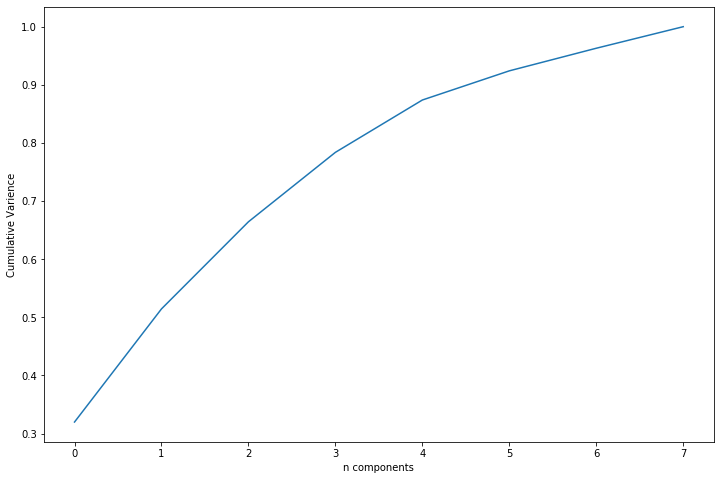

In [8]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('Cumulative Varience')

In [9]:
y = diabetes_data['test']
_, x_new =apply_pca(4)
x_new.sample(10)

,0,1,2,3
174,-2.111934,-1.053433,0.106217,-0.163534
296,-1.392067,0.215967,-0.199734,0.286970
48,-1.530388,0.397260,-1.037458,0.342512
100,-1.564838,0.671199,-0.384021,-0.377512
391,-0.710529,-1.166298,-0.166017,-0.538535
200,-0.997737,-0.334455,2.557508,-1.161669
277,-0.146509,0.042295,0.436110,-0.191756
173,-1.770427,0.162560,1.474602,0.619702
152,-0.567769,0.743253,1.605794,1.737100
164,0.273030,1.510348,-1.738559,-1.318520


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [15]:
print('Training Score', logistic_model.score(x_train, y_train))

Training Score 0.7571884984025559


In [17]:
y_pred = logistic_model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))

Accuracy Score: 0.8354430379746836
Precision Score: 0.782608695652174
Recall Score: 0.6923076923076923
